In [122]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [123]:
# LOAD DATA 
df = pd.read_csv(r'C:\Users\movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [124]:
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [125]:
df.isnull().sum()

name              0
rating           77
genre             0
year              0
released          2
score             3
votes             3
director          0
writer            3
star              1
country           3
budget         2171
gross           189
company          17
runtime           4
yearcorrect       2
dtype: int64

In [126]:
df = df.dropna(subset=[col for col in df.columns if col not in ['budget', 'gross']])

In [127]:
df.isnull().sum()

name              0
rating            0
genre             0
year              0
released          0
score             0
votes             0
director          0
writer            0
star              0
country           0
budget         2101
gross           162
company           0
runtime           0
yearcorrect       0
dtype: int64

In [128]:
df = df[~(df['budget'].isna() & df['gross'].isna())]
df.isnull().sum()

name              0
rating            0
genre             0
year              0
released          0
score             0
votes             0
director          0
writer            0
star              0
country           0
budget         1991
gross            52
company           0
runtime           0
yearcorrect       0
dtype: int64

In [129]:
df['gross_budget_ratio'] = df['gross'] / df['budget']
median_ratio = df['gross_budget_ratio'].median()
df.loc[df['budget'].isna(), 'budget'] = df['gross'] / median_ratio
df.loc[df['gross'].isna(), 'gross'] = df['budget'] / median_ratio
df['budget'] = df['budget'].round(0).astype('Int64')
df['gross'] = df['gross'].round(0).astype('Int64')

In [130]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [131]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,gross_budget_ratio
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,2.473620
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,13.078468
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,29.909726
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,23.843868
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,6.641057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020,5.767769
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,1994,3661,Prowess Pictures,98.0,2020,NaN
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,225108,413378,Pryor Entertainment,120.0,2020,NaN
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,2723,Notis Studio,78.0,2020,NaN


In [132]:
df.isnull().sum()

name                     0
rating                   0
genre                    0
year                     0
released                 0
score                    0
votes                    0
director                 0
writer                   0
star                     0
country                  0
budget                   0
gross                    0
company                  0
runtime                  0
yearcorrect              0
gross_budget_ratio    2043
dtype: int64

In [133]:
df.drop(columns=['gross_budget_ratio'], inplace=True)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,1994,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,225108,413378,Pryor Entertainment,120.0,2020
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,2723,Notis Studio,78.0,2020


In [134]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,A Polish Vampire in Burbank,Not Rated,Comedy,1983,"October 31, 1983 (United States)",5.0,275,Mark Pirro,Mark Pirro,Mark Pirro,United States,3000,1634,Pirromount Pictures,80.0,1983
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,874,1605,Balboa Entertainment,110.0,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,762,1400,British Broadcasting Corporation (BBC),103.0,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,371,682,Roxwell Films,93.0,2020


In [135]:
# cheking any duplicates
df.duplicated().sum()

0

Checking for Correlations

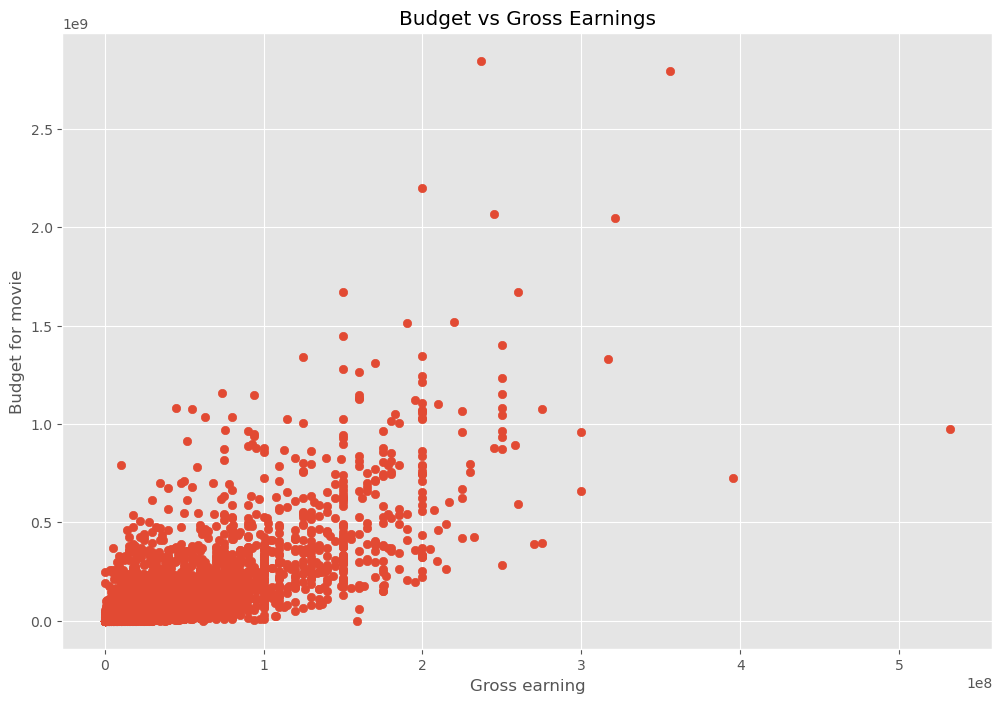

In [137]:
# scatter plot for budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross earning')
plt.ylabel('Budget for movie')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

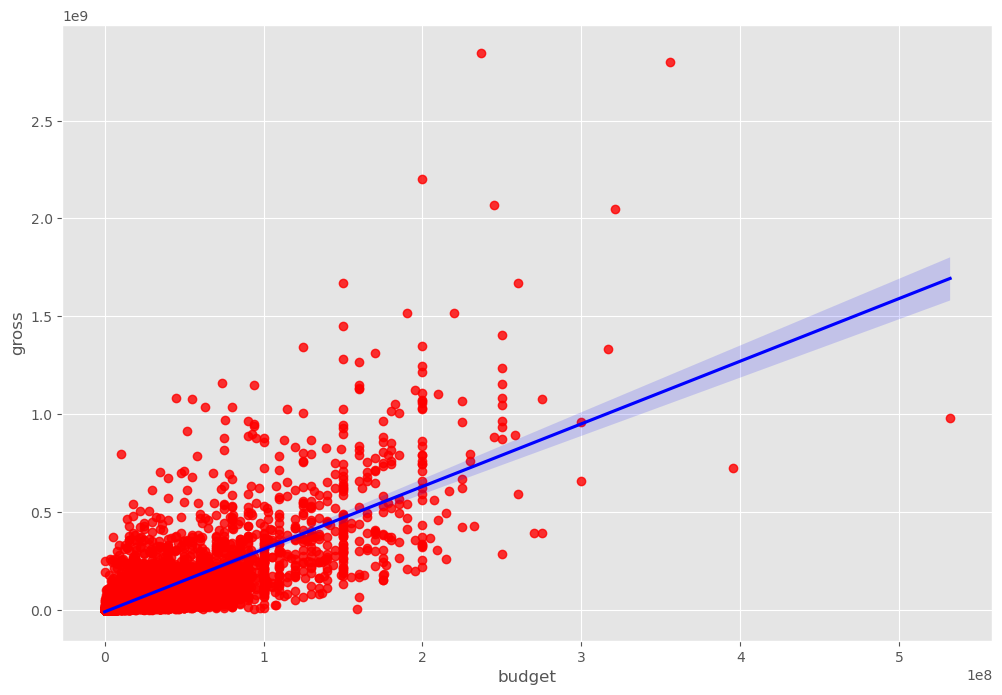

In [138]:
#Budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [139]:
df.corr(method='pearson', numeric_only=True)
## high correlation between bidget and gross of 0.756576

,year,score,votes,budget,gross,runtime
year,1.000000,0.098734,0.221074,0.308195,0.260156,0.115729
score,0.098734,1.000000,0.414590,0.070933,0.188806,0.399761
votes,0.221074,0.414590,1.000000,0.478170,0.631678,0.310044
budget,0.308195,0.070933,0.478170,1.000000,0.756576,0.280882
gross,0.260156,0.188806,0.631678,0.756576,1.000000,0.245343
runtime,0.115729,0.399761,0.310044,0.280882,0.245343,1.000000


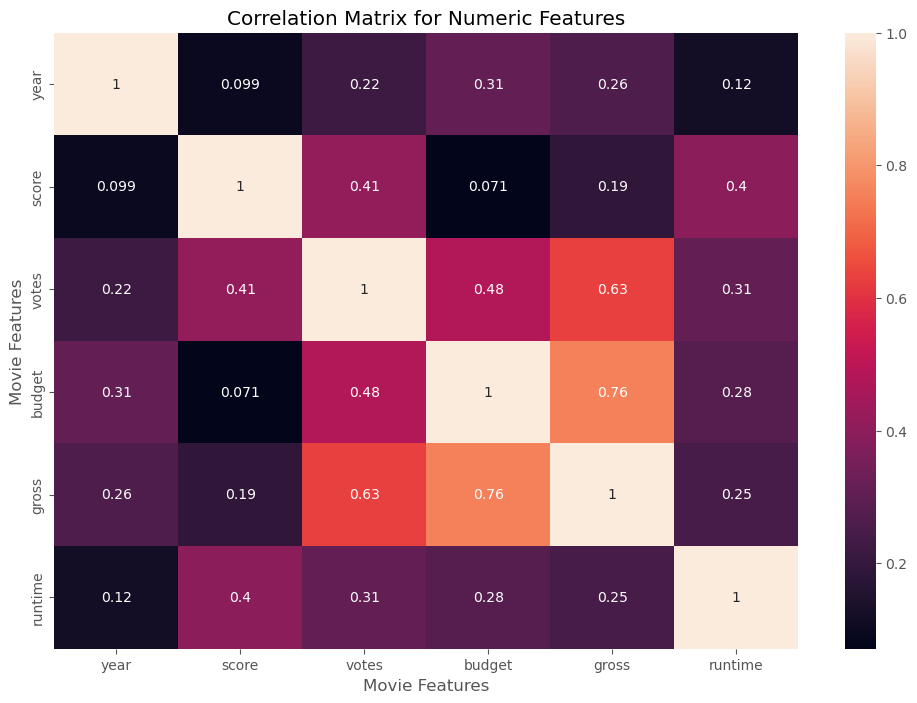

In [140]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [141]:
# COMPANY 
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [167]:
df_numerized = df.copy()  

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':  
        df_numerized[col_name] = df_numerized[col_name].astype('category').cat.codes
df_numerized.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6418,6,6,1980,1660,8.4,927000,2495,3886,992,54,19000000,46998772,2214,146.0,0
1,5415,6,1,1980,1451,5.8,65000,2192,1579,310,55,4500000,58853106,697,104.0,0
2,4995,4,0,1980,1724,8.7,1200000,1070,2488,1659,55,18000000,538375067,1466,124.0,0
3,278,4,4,1980,1451,7.7,221000,1256,1939,2136,55,3500000,83453539,1722,88.0,0
4,1000,6,4,1980,1500,7.3,108000,1016,503,392,55,6000000,39846344,1689,98.0,0


In [165]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


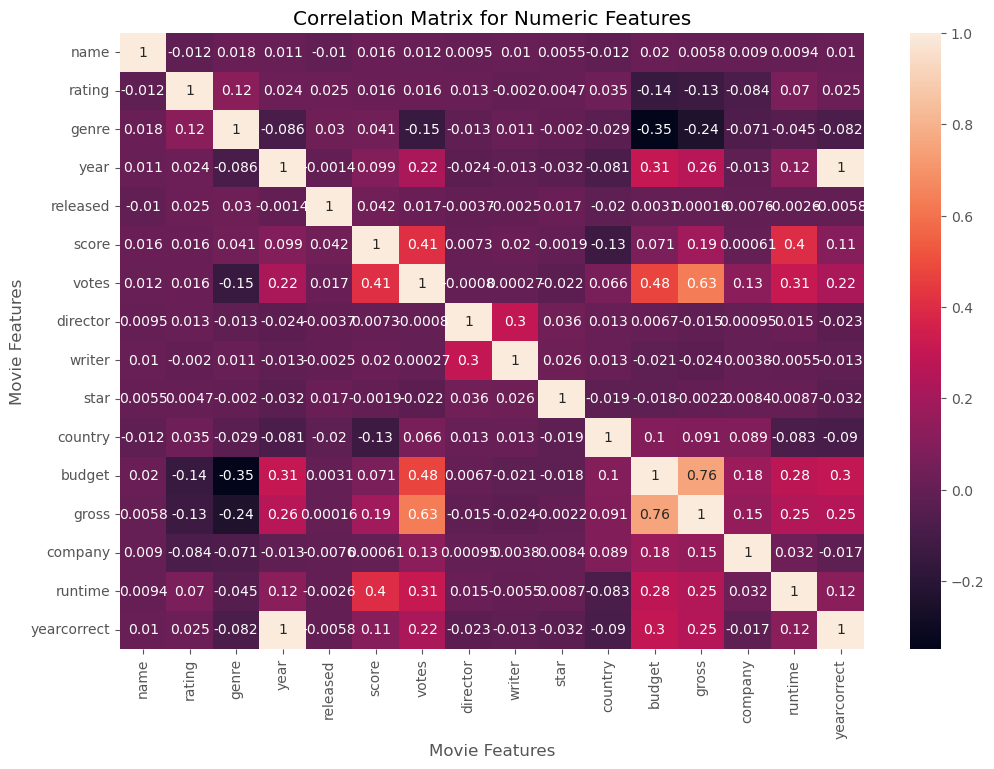

In [169]:
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [173]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.011914
             genre          0.017707
             year           0.010861
             released      -0.010373
                              ...   
yearcorrect  budget         0.299095
             gross          0.253257
             company       -0.017156
             runtime        0.115446
             yearcorrect    1.000000
Length: 256, dtype: float64

In [177]:
pd.set_option('display.max_rows', None)
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.348750
budget       genre         -0.348750
gross        genre         -0.242200
genre        gross         -0.242200
             votes         -0.148420
votes        genre         -0.148420
rating       budget        -0.144673
budget       rating        -0.144673
rating       gross         -0.131702
gross        rating        -0.131702
score        country       -0.129741
country      score         -0.129741
yearcorrect  country       -0.090135
country      yearcorrect   -0.090135
year         genre         -0.086482
genre        year          -0.086482
company      rating        -0.084068
rating       company       -0.084068
country      runtime       -0.083331
runtime      country       -0.083331
genre        yearcorrect   -0.082303
yearcorrect  genre         -0.082303
country      year          -0.080619
year         country       -0.080619
genre        company       -0.071178
company      genre         -0.071178
genre        runtime       -0.044592
r

In [181]:

high_corr = sorted_pairs[(sorted_pairs)> 0.4]
high_corr

score        votes          0.414590
votes        score          0.414590
budget       votes          0.478170
votes        budget         0.478170
             gross          0.631678
gross        votes          0.631678
             budget         0.756576
budget       gross          0.756576
yearcorrect  year           0.997571
year         yearcorrect    0.997571
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [183]:
## votes and budget have highest budget correlation to gross earnings.. 
## company has low correlation